In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors

In [2]:
## Load Force ML facies dataset

df = pd.read_csv(r"C:\Users\Ayomide\Desktop\Xeek_train_subset Dataset.csv")
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [3]:
## Making a new DF that is the copy of the original, but only certain column are copied over.

workingdf = df[["WELL", "DEPTH_MD", "RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC", "FORCE_2020_LITHOFACIES_LITHOLOGY"]].copy() 
workingdf.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'FACIES'}, inplace=True) ## Let's rename this column (note the FROM : TO) and lock the renaming in place.
workingdf.head()


,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES
0,15/9-13,494.528,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000
1,15/9-13,494.680,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000
2,15/9-13,494.832,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000
3,15/9-13,494.984,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000
4,15/9-13,495.136,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000


In [4]:
## Creating a dictionarity that contains keys (FACIES codes) and the value facies desriptions. 

lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [5]:
## Creating a dictionarity that contains keys (FACIES codes) and small values for plotting  

simple_lithology_numbers = {30000: 1,
                 65030: 2,
                 65000: 3,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12}

In [6]:
##Column mapping lithology descriptions to the Facies column
workingdf['LITH'] = workingdf['FACIES'].map(lithology_numbers)

##Column mapping "simple lith codes" to the Facies column
workingdf['LITH_SI'] = workingdf['FACIES'].map(simple_lithology_numbers)

In [7]:
##Script defines a function that will create the plot.
## The function will be called "create_plot" and use paramters for well name, the dataframe, the curves we want to plot, and the depth curve.

def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # Count the number of tracks we need based on the curves we'll call later
    num_tracks = len(curves_to_plot)
    
    facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue'] #this sets some facies colors to be used
    
            
    ## Sets up the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    ## Create a title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    ## Loop through each curve in curves_to_plot and create a track with that data (this is the long code we avoid having to copy over from the previous example)
    for i, curve in enumerate(curves_to_plot): #for each curve that's called
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed') #create a facies color bar
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), 
                            extent=[0,20, depth_curve.max(), depth_curve.min()])
        
        else:
            ax[i].plot(dataframe[curve], depth_curve)

        
        ## Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        ## We want to pass in the deepest depth first, so we are displaying the data from shallow to deep to set up the y-axis
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
#         ax[i].set_ylim(3500, 3000)

        ## Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        ## Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        

    
    plt.tight_layout()
    plt.show()
    
    return cmap_facies

In [8]:
## This function is being put together for plotting

def well_splitter(dataframe, groupby_column): ## Splits the large dataframe that includes multiple wells into individual dataframes for each well
    grouped = dataframe.groupby(groupby_column)
    
    ## Create empty lists that will be filled as we call wells
    wells_as_dfs = []
    wells_wellnames = []

    ## Splits the data by well
    for well, data in grouped:
        wells_as_dfs.append(data)
        wells_wellnames.append(well)

    print('index  wellname')
    for i, name in enumerate(wells_wellnames):
        print(f'{i}      {name}')
    
    return wells_as_dfs, wells_wellnames

In [9]:
## Run  function and print out the names of wells in the data set being used
grouped_wells, grouped_names = well_splitter(workingdf, 'WELL')

index  wellname
0      15/9-13
1      15/9-15
2      15/9-17
3      16/1-2
4      16/1-6 A
5      16/10-1
6      16/10-2
7      16/10-3
8      16/10-5
9      16/11-1 ST3
10      16/2-11 A
11      16/2-16


In [10]:
## Import the Kmeans functions from Sci-kit learn.
from sklearn.cluster import KMeans ## From the library sci kit learn, and the sublibrary cluster, pull in the Kmeans functions

In [11]:
## Dropping NaNs from our dataset to we only use rows with values for each curve
workingdf.dropna(inplace=True)

In [12]:
## Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=5)

## Fit the model to our dataset
kmeans.fit(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']]) ## the kmeans.fit function is identifying clusters across the logs we choose

## Assign the data back to the workingdf
workingdf['KMeans'] = kmeans.labels_ ## The resulting Kmeans facies identified are stored in a new column called "KMeans"

In [13]:
dfs_wells, wellnames = well_splitter(workingdf, 'WELL') ## Let's run that function that was grouping wells by name

index  wellname
0      15/9-13
1      15/9-15
2      15/9-17
3      16/1-6 A
4      16/10-1
5      16/10-2
6      16/10-3
7      16/10-5
8      16/2-11 A
9      16/2-16


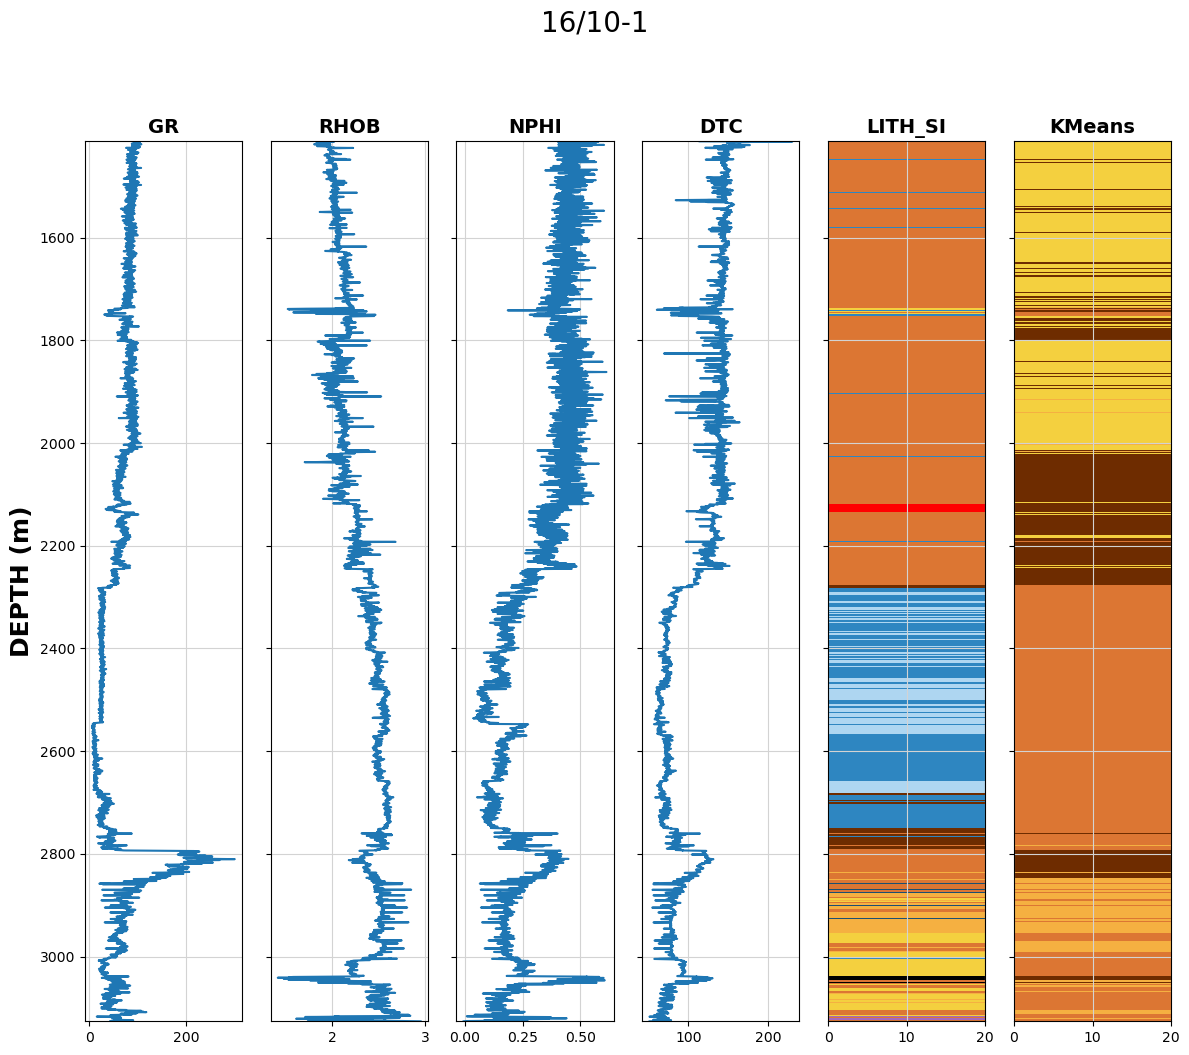

In [14]:
## Setup the curves to plot
curves_to_plot = ['GR', 'RHOB', 'NPHI', 'DTC',  'LITH_SI', 'KMeans'] #choosing the curves we want to plot
logarithmic_curves = ['RDEP'] # stating RDEP should be a in log space
facies_curve=['KMeans','LITH_SI'] # defining which curves are the facies curves

## Create plot by passing in the relevant well index number
well = 4 ## Choosing Well 4 to plot
cmap_facies = create_plot(wellnames[well], 
            dfs_wells[well], 
            curves_to_plot, 
            dfs_wells[well]['DEPTH_MD'], 
            logarithmic_curves, facies_curve)

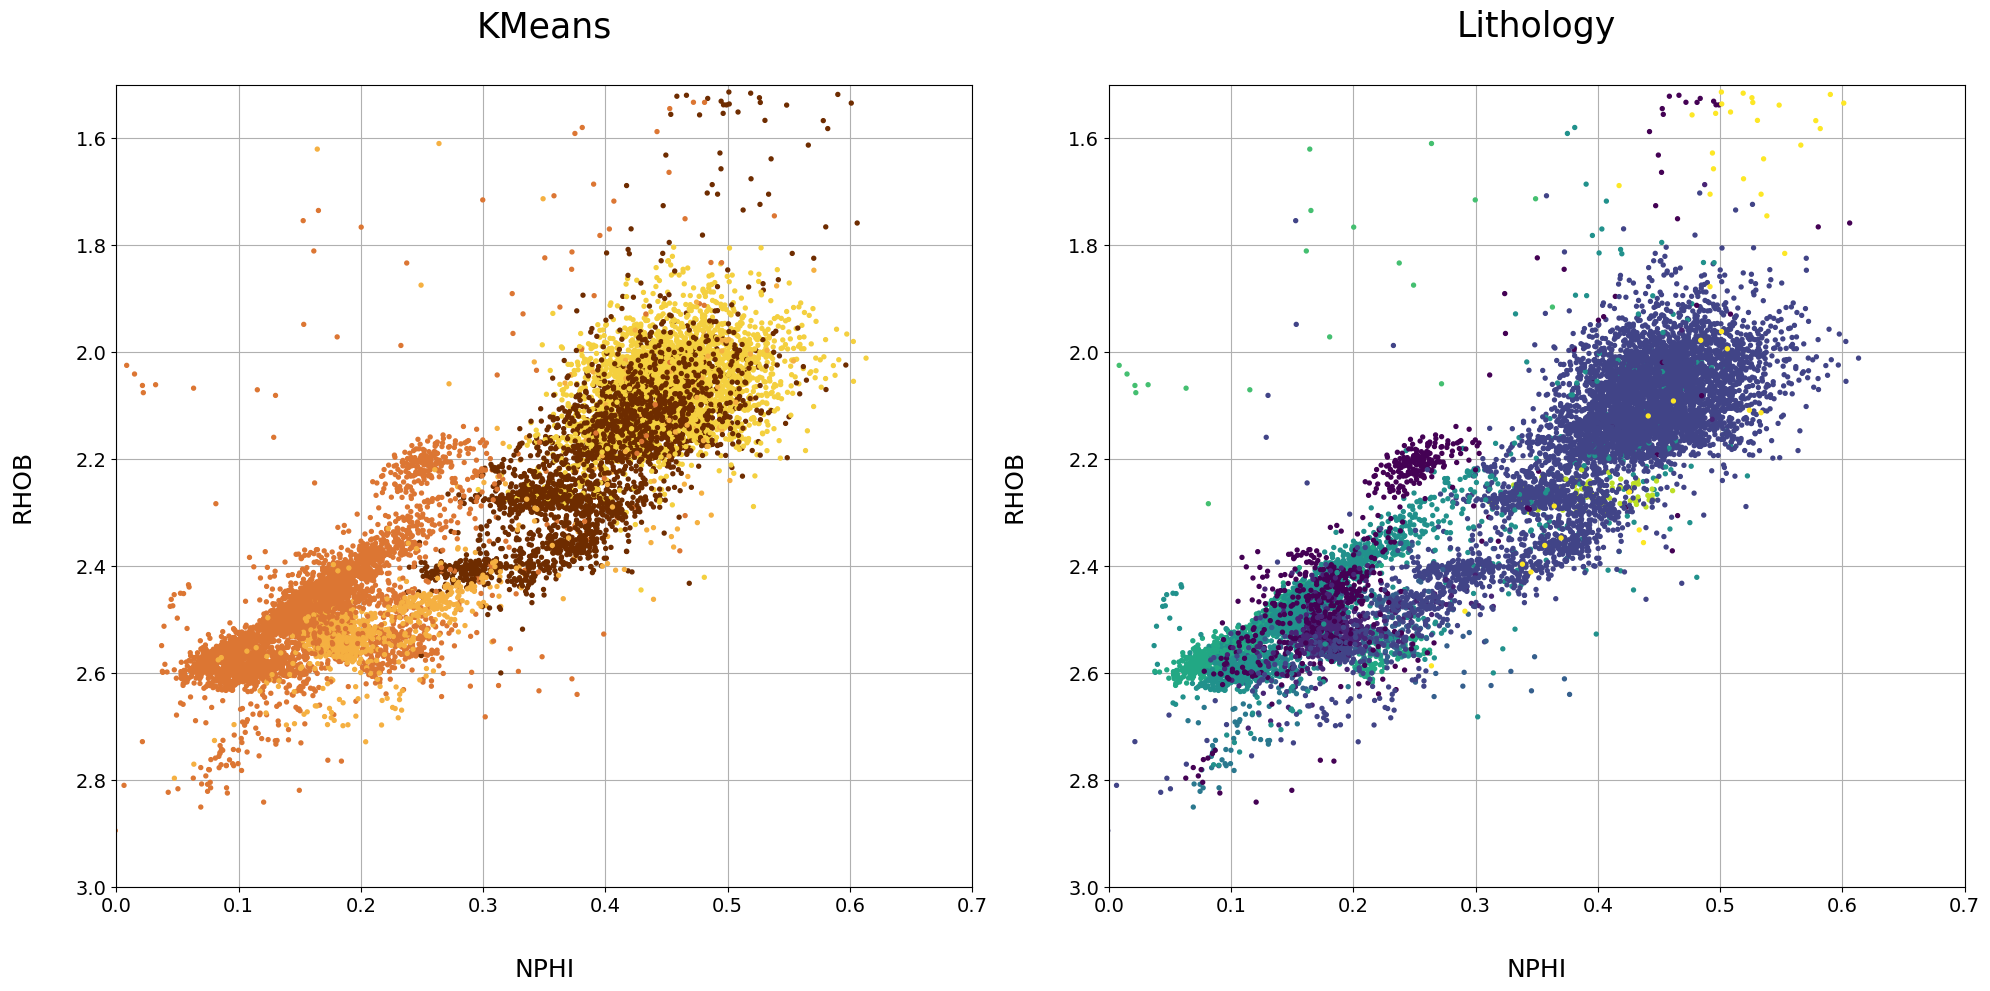

In [17]:
fig, ax = plt.subplots(figsize=(20,10))

## Kmeans facies plot
ax1 = plt.subplot2grid((1,2), (0,0)) 
ax1.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['KMeans'], s=8, cmap=cmap_facies) ## Using the scatter function and plotting NPHI vs RHOB colored by Kmeans facies
ax1.set_title('KMeans', fontsize=25, y=1.05)

## Second scatter plot for lithology 
ax2 = plt.subplot2grid((1,2), (0,1)) 
ax2.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['LITH_SI'], s=8) ## Using the scatter function and plotting NPHI vs RHOB colored by actual lithology
ax2.set_title('Lithology', fontsize=25, y=1.05)

## Function that makes making axis lables nicer
for ax in [ax1, ax2]:
    ax.set_xlim(0, 0.7)
    ax.set_ylim(3, 1.5)
    ax.set_ylabel('RHOB', fontsize=18, labelpad=30)
    ax.set_xlabel('NPHI', fontsize=18, labelpad=30)
    ax.grid()
    ax.set_axisbelow(True)

    ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()